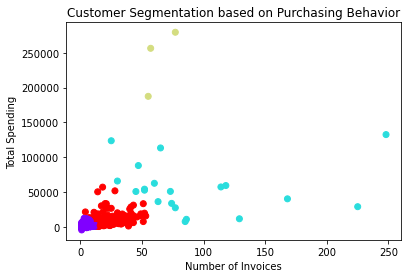

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("C:/Users/hna024/Downloads/Capstoneprojects/OnlineRetail.csv", encoding="ISO-8859-1")


# Data Preprocessing
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Exploratory Data Analysis and Insights
# Top-selling products
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Sales trends
monthly_sales = data.resample('M', on='InvoiceDate')['TotalPrice'].sum()

# Customer Segmentation
customer_data = data.groupby('CustomerID').agg({
    'InvoiceDate': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

# Standardize the features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['InvoiceDate', 'TotalPrice']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot customer segments
plt.scatter(customer_data['InvoiceDate'], customer_data['TotalPrice'], c=customer_data['Cluster'], cmap='rainbow')
plt.xlabel('Number of Invoices')
plt.ylabel('Total Spending')
plt.title('Customer Segmentation based on Purchasing Behavior')
plt.show()
